In [2]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:

pip install numpy tensorflow


Note: you may need to restart the kernel to use updated packages.


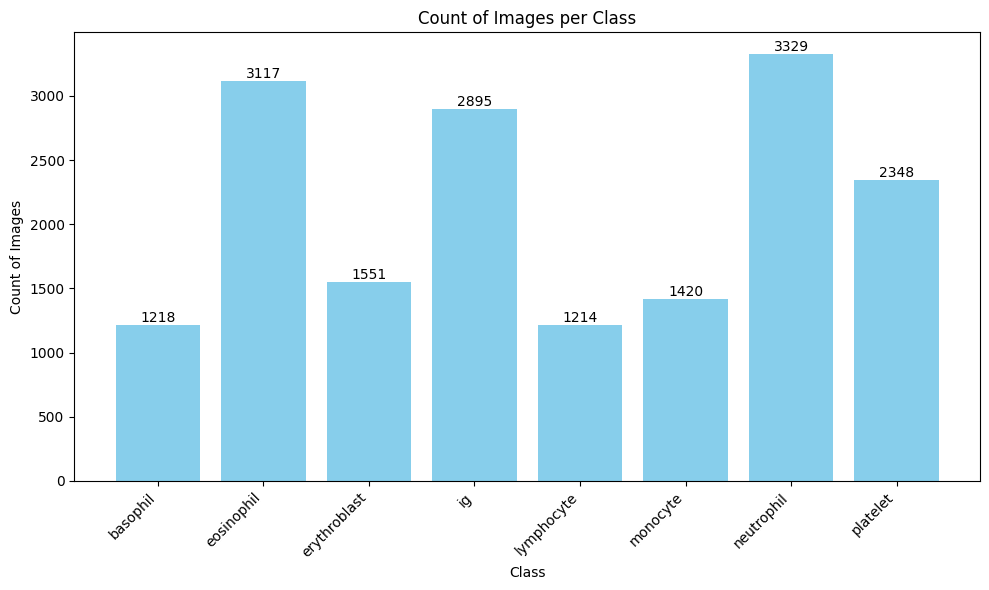

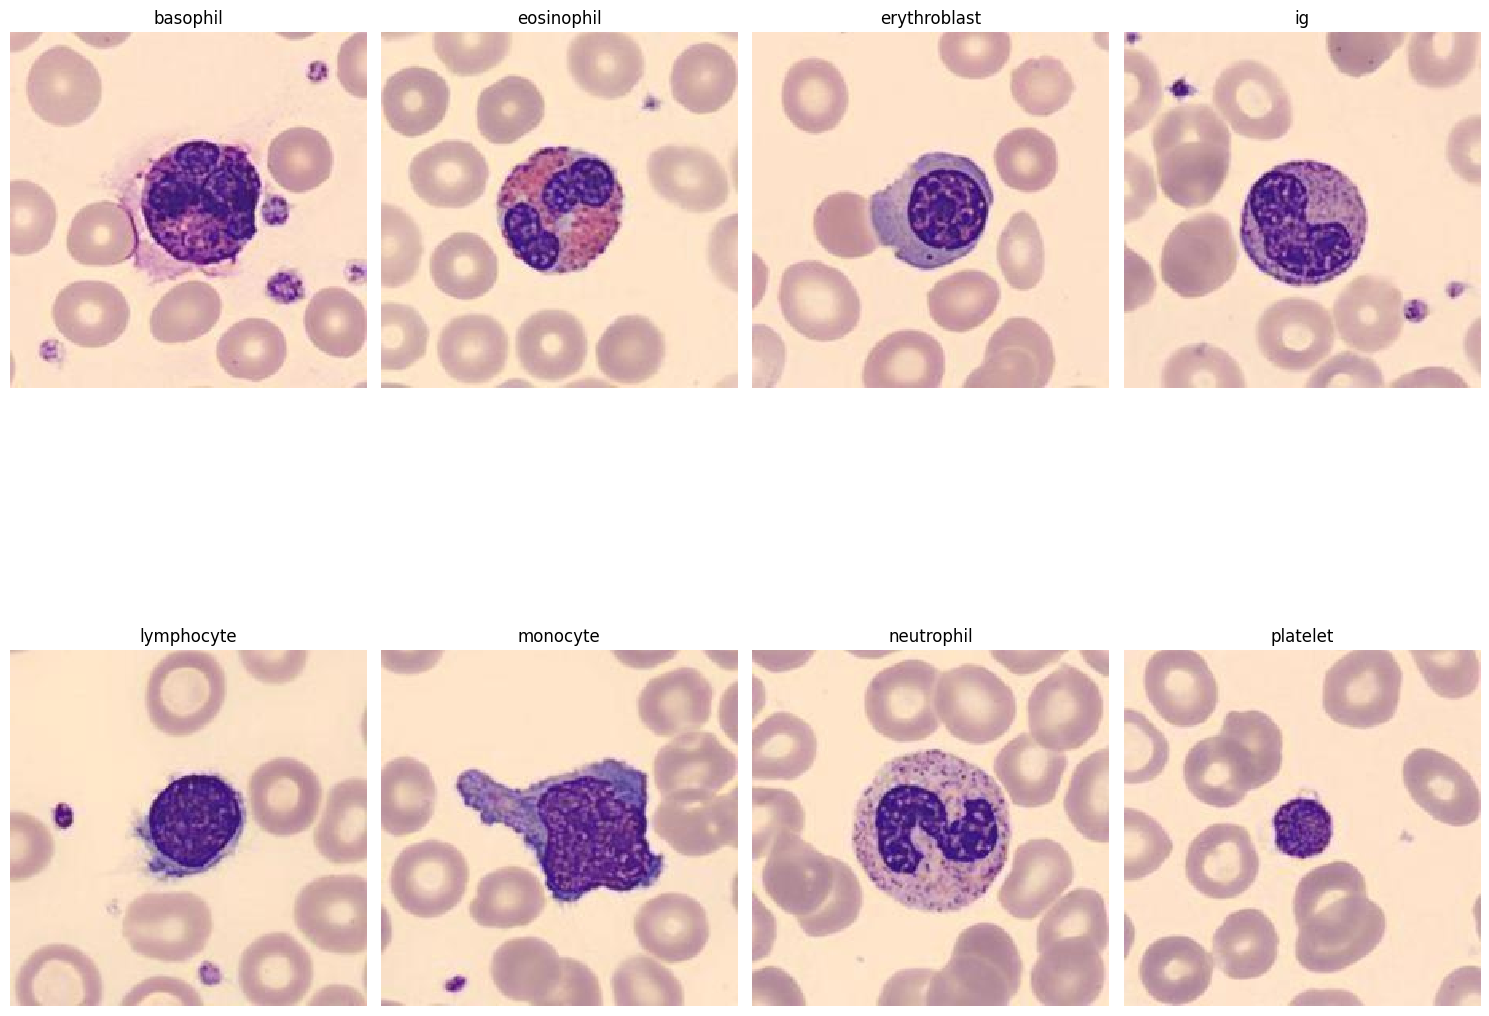

Shape of images array: (17092, 224, 224, 3)
Shape of labels array: (17092,)


In [1]:
# Importing necessary libraries

import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from PIL import Image
import random
import torchvision.transforms as transforms



# Setting the directory path for the dataset
dataset_path = 'C:\\Users\\anu\\Downloads\\bloodcells_dataset'


# Counting images per class
class_names = []
counts = []
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        num_files = len([filename for filename in os.listdir(class_dir)
                         if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.gif'))])
        class_names.append(class_name)
        counts.append(num_files)

# Displaying bar plot for counting images per class
plt.figure(figsize=(10, 6))
bars = plt.bar(class_names, counts, color='skyblue')
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom', color='black')
plt.xlabel('Class')
plt.ylabel('Count of Images')
plt.title('Count of Images per Class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Displaying random images per class
num_rows = 2
num_cols = 4
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))
classes = os.listdir(dataset_path)
for i, class_name in enumerate(classes):
    row = i // num_cols
    col = i % num_cols
    class_path = os.path.join(dataset_path, class_name)
    random_image = random.choice(os.listdir(class_path))
    image_path = os.path.join(class_path, random_image)
    with Image.open(image_path) as img:
        axs[row, col].imshow(img, interpolation='nearest')
        axs[row, col].set_title(class_name)
        axs[row, col].axis('off')
plt.tight_layout()
plt.show()


# Splitting the dataset by stratified random sampling
# Initialize lists to store images and labels
images = []
labels = []

# Iterate through all directories in the main directory
for class_name in os.listdir(dataset_path):
    # Construct the full path of the current directory
    class_dir = os.path.join(dataset_path, class_name)

    # Check if the path is a directory
    if os.path.isdir(class_dir):
        # Iterate through all files in the class directory
        for filename in os.listdir(class_dir):
            # Load the image
            image_path = os.path.join(class_dir, filename)
            image = Image.open(image_path)
            
            # Resize the image if needed (optional)
            image = image.resize((224, 224))

            # Convert the image to numpy array and store it
            images.append(np.array(image))

            # Store the label
            labels.append(class_name)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Print the shapes of images and labels arrays
print("Shape of images array:", images.shape)
print("Shape of labels array:", labels.shape)


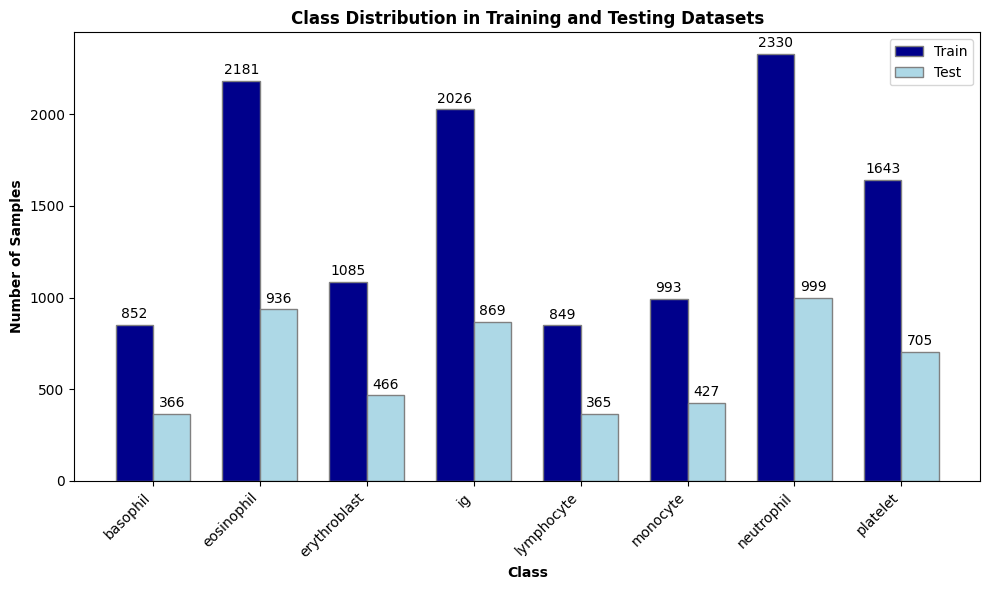

In [2]:
# Step 1: Count the samples in each class
class_counts = {}
for label in np.unique(labels):
    class_counts[label] = np.sum(labels == label)

# Step 2: Determine the desired split ratio
split_ratio = 0.7  # 70% for training, 30% for testing

# Step 3: Calculate the number of samples for each split
train_class_counts = {label: int(count * split_ratio) for label, count in class_counts.items()}
test_class_counts = {label: count - train_class_counts[label] for label, count in class_counts.items()}

# Step 4: Stratified sampling
train_indices = []
test_indices = []
for label in np.unique(labels):
    label_indices = np.where(labels == label)[0]
    train_label_indices, test_label_indices = train_test_split(label_indices,
                                                              train_size=train_class_counts[label],
                                                              test_size=test_class_counts[label],
                                                              stratify=labels[label_indices])
    train_indices.extend(train_label_indices)
    test_indices.extend(test_label_indices)

# Step 5: Create training and testing datasets
X_train, X_test = images[train_indices], images[test_indices]
y_train, y_test = labels[train_indices], labels[test_indices]

# Combine images and labels for training set
train_dataset = list(zip(X_train, y_train))

# Combine images and labels for testing set
test_dataset = list(zip(X_test, y_test))


# Plotting the class distribution for both training and testing datasets
train_classes, train_counts = np.unique(y_train, return_counts=True)
test_classes, test_counts = np.unique(y_test, return_counts=True)

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
r1 = np.arange(len(train_classes))
r2 = [x + bar_width for x in r1]

ax.bar(r1, train_counts, color='darkblue', width=bar_width, edgecolor='grey', label='Train')
ax.bar(r2, test_counts, color='lightblue', width=bar_width, edgecolor='grey', label='Test')

for i, count in enumerate(train_counts):
    ax.text(r1[i], count + 20, str(count), ha='center', va='bottom')
for i, count in enumerate(test_counts):
    ax.text(r2[i], count + 20, str(count), ha='center', va='bottom')

ax.set_xlabel('Class', fontweight='bold')
ax.set_ylabel('Number of Samples', fontweight='bold')
ax.set_xticks([r + bar_width/2 for r in range(len(train_classes))])
ax.set_xticklabels(train_classes, rotation=45, ha='right')

ax.set_xlabel('Class', fontweight='bold')
ax.set_ylabel('Number of Samples', fontweight='bold')
ax.set_title('Class Distribution in Training and Testing Datasets', fontweight='bold')
ax.legend()

plt.tight_layout()
plt.show()

In [5]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.
     -------------------------------------- 258.0/258.0 kB 2.6 MB/s eta 0:00:00


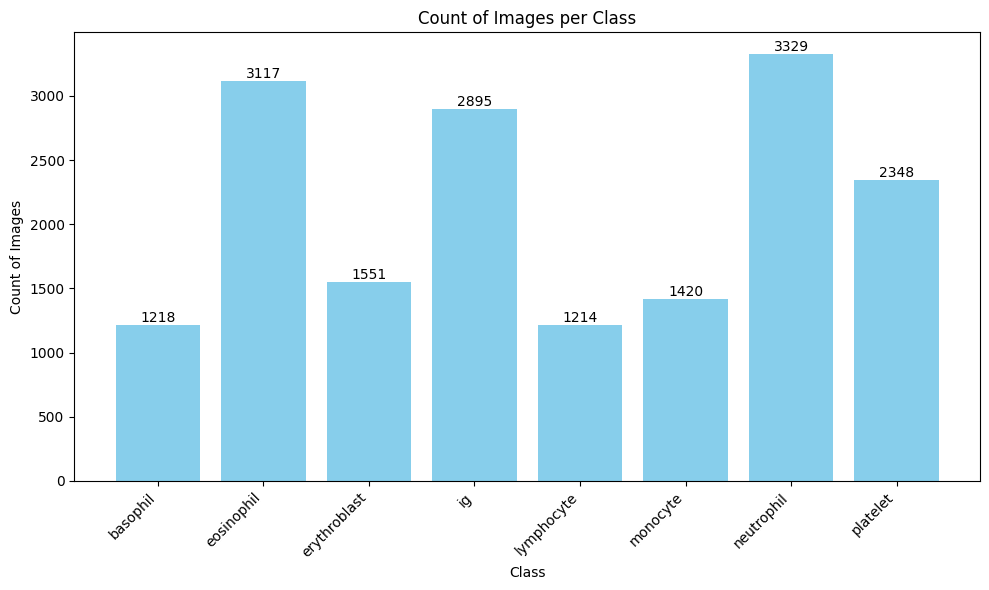

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,781,384 (56.39 MB)

 Trainable params: 66,696 (260.53 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/20


C:\Users\anu\anaconda3\envs\datascience\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


374/374 ━━━━━━━━━━━━━━━━━━━━ 3510s 9s/step - accuracy: 0.4075 - loss: 2.7103 - val_accuracy: 0.6755 - val_loss: 0.9477
Epoch 2/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 3480s 9s/step - accuracy: 0.6922 - loss: 0.8703 - val_accuracy: 0.7155 - val_loss: 0.8029
Epoch 3/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 2881s 8s/step - accuracy: 0.7456 - loss: 0.7252 - val_accuracy: 0.7851 - val_loss: 0.6378
Epoch 4/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 2705s 7s/step - accuracy: 0.7580 - loss: 0.6861 - val_accuracy: 0.7738 - val_loss: 0.6641
Epoch 5/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 3371s 9s/step - accuracy: 0.7717 - loss: 0.6613 - val_accuracy: 0.7804 - val_loss: 0.6288
Epoch 6/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 3512s 9s/step - accuracy: 0.7731 - loss: 0.6353 - val_accuracy: 0.7859 - val_loss: 0.6285
Epoch 7/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 3038s 8s/step - accuracy: 0.7853 - loss: 0.6025 - val_accuracy: 0.7937 - val_loss: 0.5816
Epoch 8/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 3210s 9s/step - accuracy: 0.7928 - loss: 0.5832 - val_accurac

In [11]:
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from PIL import Image
import random
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Add this import statement


# Setting the directory path for the dataset
dataset_path = 'C:\\Users\\anu\\Downloads\\bloodcells_dataset'

# Counting images per class
class_names = []
counts = []
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        num_files = len([filename for filename in os.listdir(class_dir)
                         if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.gif'))])
        class_names.append(class_name)
        counts.append(num_files)

# Displaying bar plot for counting images per class
plt.figure(figsize=(10, 6))
bars = plt.bar(class_names, counts, color='skyblue')
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom', color='black')
plt.xlabel('Class')
plt.ylabel('Count of Images')
plt.title('Count of Images per Class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Splitting the dataset by stratified random sampling
# Initialize lists to store images and labels
images = []
labels = []

# Iterate through all directories in the main directory
for class_name in os.listdir(dataset_path):
    # Construct the full path of the current directory
    class_dir = os.path.join(dataset_path, class_name)

    # Check if the path is a directory
    if os.path.isdir(class_dir):
        # Iterate through all files in the class directory
        for filename in os.listdir(class_dir):
            # Load the image
            image_path = os.path.join(class_dir, filename)
            image = Image.open(image_path)
            
            # Resize the image if needed (optional)
            image = image.resize((224, 224))

            # Convert the image to numpy array and store it
            images.append(np.array(image))

            # Store the label
            labels.append(class_name)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Splitting the data into training and testing by stratified random sampling
# Perform stratified random split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, stratify=labels)

# Define the number of classes
num_classes = len(np.unique(labels))

# Load VGG16 model pretrained on ImageNet dataset
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained weights
base_model.trainable = False

# Create a new model on top of the pre-trained model
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(num_classes)(x)

# Compile the model
model_vgg16 = tf.keras.Model(inputs, outputs)

# Display model summary
model_vgg16.summary()

# Compile the model
model_vgg16.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

# Create ImageDataGenerator for data augmentation without shuffling
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Fit ImageDataGenerator on training data
datagen.fit(X_train)

# Train the model with data augmentation
model_vgg16.fit(datagen.flow(X_train, y_train_encoded, batch_size=32, shuffle=False), epochs=20, validation_data=(X_test, y_test_encoded))

# Evaluate model on test set
test_loss, test_acc = model_vgg16.evaluate(X_test, y_test_encoded)

# Generate predictions
predictions = model_vgg16.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test_encoded, predicted_classes, average='weighted')
recall = recall_score(y_test_encoded, predicted_classes, average='weighted')
f1 = f1_score(y_test_encoded, predicted_classes, average='weighted')
print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")
print(f"Precision: {precision}, Recall: {recall}, F1-score: {f1}")

# Calculate confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_test_encoded, predicted_classes)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix.numpy())

# Calculate counts of correct and incorrect predictions for each class
correct_counts = np.diag(confusion_matrix)
incorrect_counts = np.sum(confusion_matrix, axis=1) - correct_counts

# Print counts of correct and incorrect predictions for each class
for i, class_name in enumerate(class_names):
    print(f"Class: {class_name}, Correct Predictions: {correct_counts[i]}, Incorrect Predictions: {incorrect_counts[i]}")


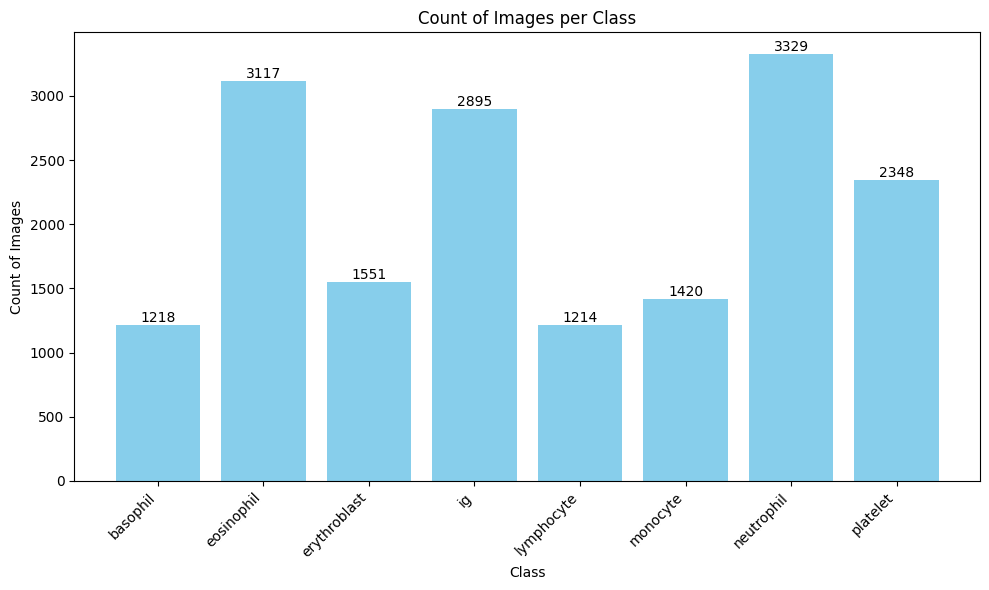

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,781,384 (56.39 MB)

 Trainable params: 66,696 (260.53 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/20


C:\Users\anu\anaconda3\envs\datascience\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


374/374 ━━━━━━━━━━━━━━━━━━━━ 2932s 8s/step - accuracy: 0.4308 - loss: 2.1454 - val_accuracy: 0.6968 - val_loss: 0.8928
Epoch 2/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 2652s 7s/step - accuracy: 0.6950 - loss: 0.8747 - val_accuracy: 0.7467 - val_loss: 0.7317
Epoch 3/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 2643s 7s/step - accuracy: 0.7400 - loss: 0.7623 - val_accuracy: 0.7401 - val_loss: 0.7224
Epoch 4/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 2679s 7s/step - accuracy: 0.7568 - loss: 0.7036 - val_accuracy: 0.7623 - val_loss: 0.6722
Epoch 5/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 2637s 7s/step - accuracy: 0.7563 - loss: 0.6827 - val_accuracy: 0.7917 - val_loss: 0.6160
Epoch 6/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 2705s 7s/step - accuracy: 0.7739 - loss: 0.6554 - val_accuracy: 0.7806 - val_loss: 0.6102
Epoch 7/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 3389s 9s/step - accuracy: 0.7854 - loss: 0.6215 - val_accuracy: 0.7533 - val_loss: 0.7075
Epoch 8/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 3471s 9s/step - accuracy: 0.7848 - loss: 0.6141 - val_accurac

In [3]:
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from PIL import Image
import random
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Add this import statement


# Setting the directory path for the dataset
dataset_path = 'C:\\Users\\anu\\Downloads\\bloodcells_dataset'

# Counting images per class
class_names = []
counts = []
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        num_files = len([filename for filename in os.listdir(class_dir)
                         if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.gif'))])
        class_names.append(class_name)
        counts.append(num_files)

# Displaying bar plot for counting images per class
plt.figure(figsize=(10, 6))
bars = plt.bar(class_names, counts, color='skyblue')
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom', color='black')
plt.xlabel('Class')
plt.ylabel('Count of Images')
plt.title('Count of Images per Class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Splitting the dataset by stratified random sampling
# Initialize lists to store images and labels
images = []
labels = []

# Iterate through all directories in the main directory
for class_name in os.listdir(dataset_path):
    # Construct the full path of the current directory
    class_dir = os.path.join(dataset_path, class_name)

    # Check if the path is a directory
    if os.path.isdir(class_dir):
        # Iterate through all files in the class directory
        for filename in os.listdir(class_dir):
            # Load the image
            image_path = os.path.join(class_dir, filename)
            image = Image.open(image_path)
            
            # Resize the image if needed (optional)
            image = image.resize((224, 224))

            # Convert the image to numpy array and store it
            images.append(np.array(image))

            # Store the label
            labels.append(class_name)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Splitting the data into training and testing by stratified random sampling
# Perform stratified random split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, stratify=labels)

# Define the number of classes
num_classes = len(np.unique(labels))

# Load VGG16 model pretrained on ImageNet dataset
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained weights
base_model.trainable = False

# Create a new model on top of the pre-trained model
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(num_classes)(x)

# Compile the model
model_vgg16 = tf.keras.Model(inputs, outputs)

# Display model summary
model_vgg16.summary()

# Compile the model
model_vgg16.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

# Create ImageDataGenerator for data augmentation without shuffling
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Fit ImageDataGenerator on training data
datagen.fit(X_train)

# Train the model with data augmentation
model_vgg16.fit(datagen.flow(X_train, y_train_encoded, batch_size=32, shuffle=True), epochs=20, validation_data=(X_test, y_test_encoded))

# Evaluate model on test set
test_loss, test_acc = model_vgg16.evaluate(X_test, y_test_encoded)

# Generate predictions
predictions = model_vgg16.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test_encoded, predicted_classes, average='weighted')
recall = recall_score(y_test_encoded, predicted_classes, average='weighted')
f1 = f1_score(y_test_encoded, predicted_classes, average='weighted')
print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")
print(f"Precision: {precision}, Recall: {recall}, F1-score: {f1}")

# Calculate confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_test_encoded, predicted_classes)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix.numpy())

# Calculate counts of correct and incorrect predictions for each class
correct_counts = np.diag(confusion_matrix)
incorrect_counts = np.sum(confusion_matrix, axis=1) - correct_counts

# Print counts of correct and incorrect predictions for each class
for i, class_name in enumerate(class_names):
    print(f"Class: {class_name}, Correct Predictions: {correct_counts[i]}, Incorrect Predictions: {incorrect_counts[i]}")
